### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

Dober vir informacij za avdio v pythonu: https://musicinformationretrieval.com/ipython_audio.html

In [8]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.constants import *
from scipy.io import wavfile
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# Kvantizacija

Signal bomo bolj grobo kvantizirali tako, da ga bomo delili z $2^n$, kar je ekvivalent binarnemu pomiku v desno, in odstranili vse kar je za decimalno vejico z ukazom int_ (celo število od ...). Signal nato nazaj pomnožimo z $2^n$, da ohranimo začetno glasnost signala.

Signalu lahko tudi nastavite ojačenje, da vidite kako se zrnati šum pozna pri različnih velikostih signala.

Ojačen signal je omejen na območje 16 bitnih predznačenih števil, tako da lahko s pomočjo primerno velikega ojačenja simulirate tudi prekoračitveno popačenje

<ipython-input-34-045f7b94afea>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound_data = wavfile.read('sample44100.wav')


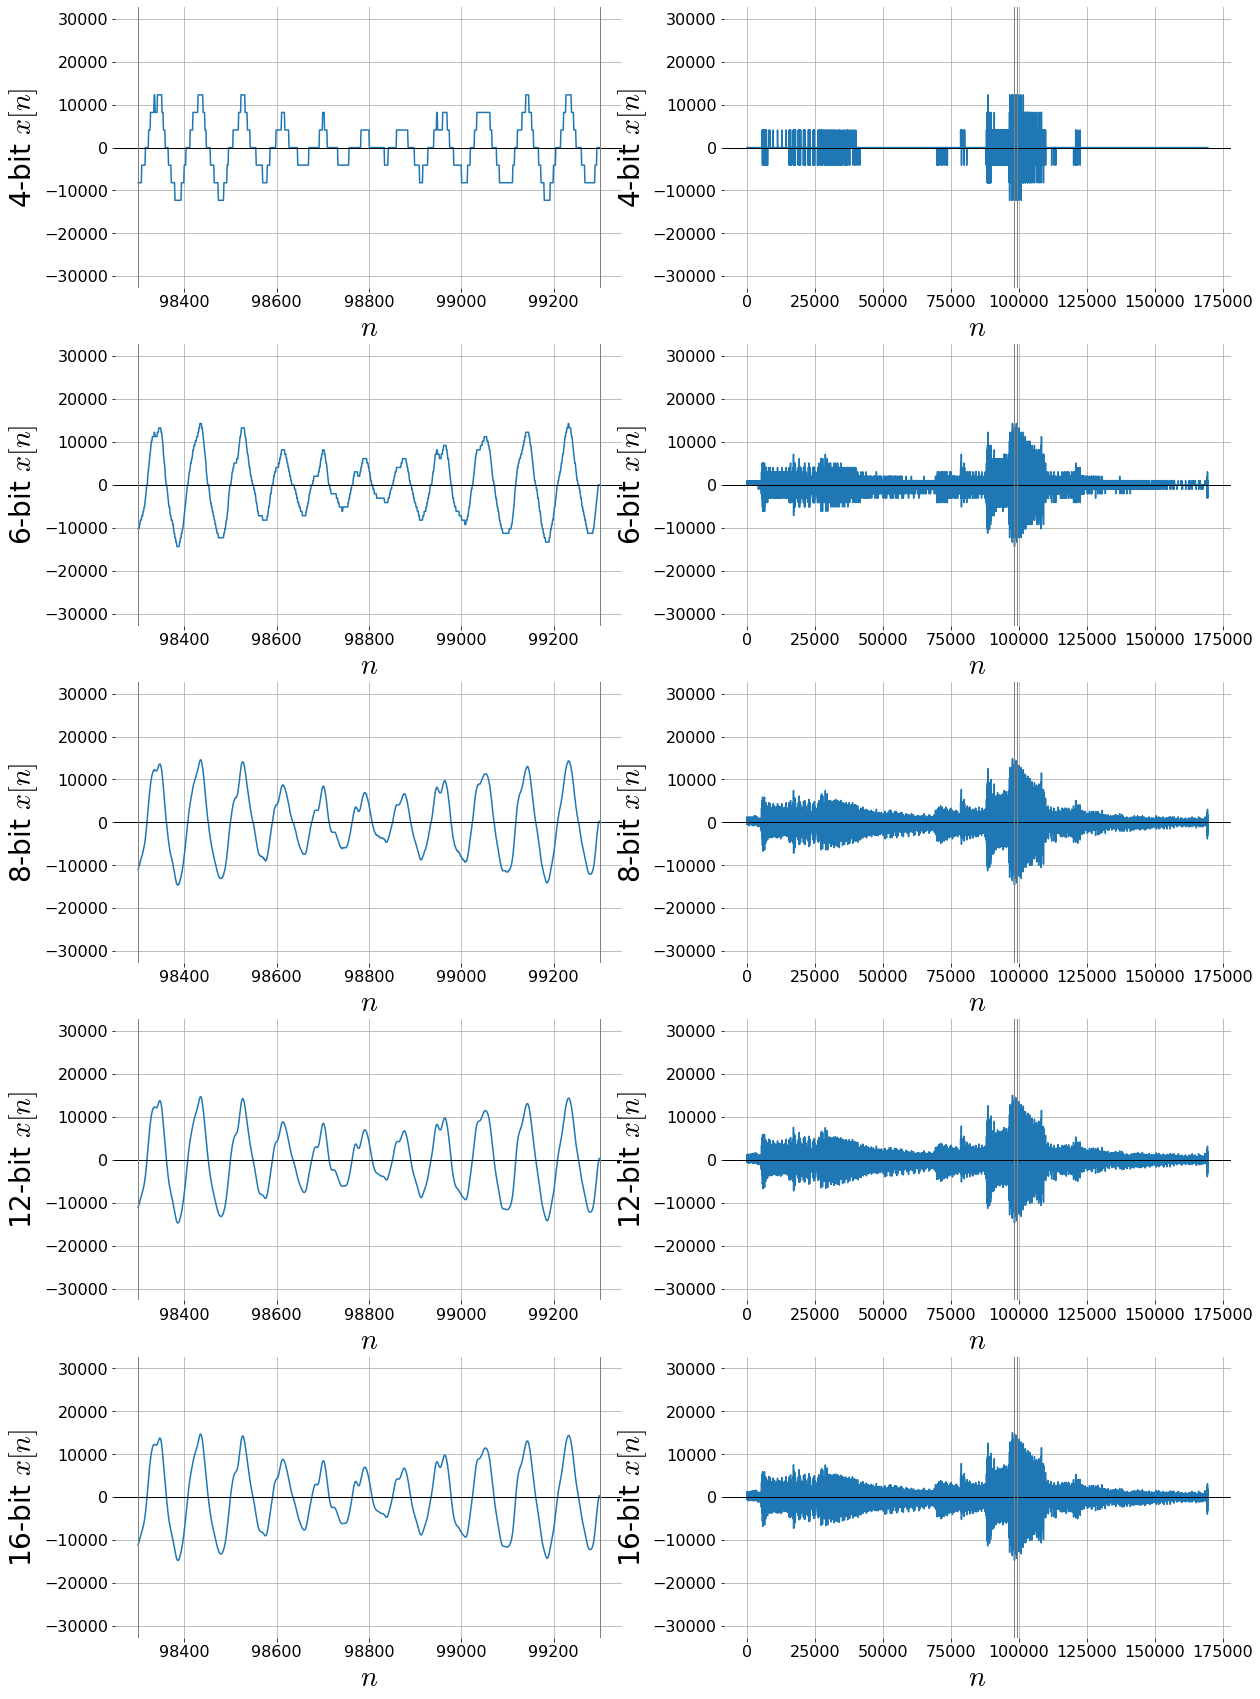

In [34]:
#preberi vzorec signala
samplerate, sound_data = wavfile.read('sample44100.wav')
#in ga razdeli na levi in desni kanal. Za demonstracijo bomo uporabili samo en kanal
x_left=sound_data[:,0]
x_right=sound_data[:,1]

Ojacenje=1                #Poskusite spremeniti velikost signala s spreminjanjem ojacenja, da vidite kako se pozna kvantizacijski šum pri različnih velikostih signala
x_left=int16(maximum(minimum(Ojacenje*float64(x_left),2**15-1),-2**15)) #Signal ojačimo, omejimo na min in max 16bitnega predznačenega števila in pretvorimo v 16 bitno celo število

x_4bit=int_(x_left/2**(16-4))*2**(16-4)              #6-bitni signal
x_6bit=int_(x_left/2**(16-6))*2**(16-6)              #6-bitni signal
x_8bit=int_(x_left/2**(16-8))*2**(16-8)              #8-bitni signal
x_12bit=int_(x_left/2**(16-12))*2**(16-12)           #12-bitni signal

#Risanje
fig, ax = plt.subplots(5,2,figsize=(20,30))
seg_start=98300
seg_length=1000
ax[0,0].plot(range(seg_start,seg_start+seg_length),x_4bit[seg_start:seg_start+seg_length])
ax[0,1].plot(x_4bit)
ax[1,0].plot(range(seg_start,seg_start+seg_length),x_6bit[seg_start:seg_start+seg_length])
ax[1,1].plot(x_6bit)
ax[2,0].plot(range(seg_start,seg_start+seg_length),x_8bit[seg_start:seg_start+seg_length])
ax[2,1].plot(x_8bit)
ax[3,0].plot(range(seg_start,seg_start+seg_length),x_12bit[seg_start:seg_start+seg_length])
ax[3,1].plot(x_12bit)
ax[4,0].plot(range(seg_start,seg_start+seg_length),x_left[seg_start:seg_start+seg_length])
ax[4,1].plot(x_left)

for j in range(0,2):
    for i in range(0,5):
        ax[i,j].axhline(0, color='black', lw=1)
        ax[i,j].axvline(seg_start, color='gray', lw=1)
        ax[i,j].axvline(seg_start+seg_length, color='gray', lw=1)
        ax[i,j].set_xlabel(r'$n$', fontsize=28)
        ax[i,j].grid(which="both")
        ax[i,j].set_frame_on(False)
        ax[i,j].set_ylim([-2**15,2**15-1])
    ax[0,j].set_ylabel(r'4-bit $x[n]$', fontsize=28)
    ax[1,j].set_ylabel(r'6-bit $x[n]$', fontsize=28)
    ax[2,j].set_ylabel(r'8-bit $x[n]$', fontsize=28)
    ax[3,j].set_ylabel(r'12-bit $x[n]$', fontsize=28)
    ax[4,j].set_ylabel(r'16-bit $x[n]$', fontsize=28)

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

# Play Audio

In [19]:
ipd.Audio(x_4bit,rate=samplerate)

In [18]:
ipd.Audio(x_6bit,rate=samplerate)

In [91]:
ipd.Audio(x_8bit,rate=samplerate)

In [92]:
ipd.Audio(x_12bit,rate=samplerate)

In [29]:
ipd.Audio(x_left,rate=samplerate)